In [ ]:
import numpy as np

# 1st step

In [ ]:
def generate_matrix(N, S):
  ##parameter S is obvious but parameter N is needed as in dimension N*D we will get D from S but not N that's why

  M, D = S.shape
  #to get M for generating random 2D array(Z) and D for Input data matrix X
  Z = np.random.randn(N, M)
  # 1
  # if every element is of random distribution the so the column of array
  X = Z @ S
  # 2
  #just normal matrix multiplication
  return X


1. https://images.app.goo.gl/p8izyVVYiFcsxGAr9
2. https://images.app.goo.gl/MuF5mJfeX3bSCAEv9

needed to think about normal distribution columns of S also the N parameter, explaination below line of code itself

observation would be that understanding the need N parameter , it is not very obvious , and also didn't know that there where 3 syntaxes(ways) for matrix multiplcation in np

# 2nd step

In [ ]:
def generate_targetVector(X, W, sigma):

  N, D = X.shape
  # to get shape to check dimension mismatch of X ,W
  if len(W) != D:
    print(f"Dimension mismatch: w have size {D+1}, and X got {D}")
    #as it was written in question , didn't understand why as there should always be the mismatch as there will be always a bias term in weight vector

  weight = W[:-1]
  #all elements except last as it is bias
  #inspiration 1
  bias = W[-1]

  t = X @ weight
  #simple matrix multiplication

  noise = np.random.normal(0, np.sqrt(sigma), size = N)
  #size of target vector as it is going to be added in that
  # inspiration 2

  t = t + noise

  return t


1. https://images.app.goo.gl/hH2EHp985Qg2uHne8
2. Chatgptied  zero-mean Gaussian noisewith variance sigma in numpy python

needed inspiration for noise and last element[-1] , explanation below line of code

my observations would be that I first thought of "for loooping'in weight matrix as I didn't know how to get no. of element(we can use .shape method ig but i thought it is only for 2d or 3d matrices, don't know why), got to know about addressing last element as "-1" which made things as simple as possible

# 3rd step

In [ ]:
import time #to measure time in solving , didn't know any other method
import matplotlib.pyplot as plt # to plot


Time taken : N = 10: 0.000322 seconds
Time taken : N = 100: 0.000310 seconds
Time taken : N = 1000: 0.002028 seconds
Time taken : N = 5000: 0.004012 seconds
Time taken : N = 10000: 0.004959 seconds
Time taken : N = 50000: 0.018525 seconds
Time taken : N = 100000: 0.051220 seconds


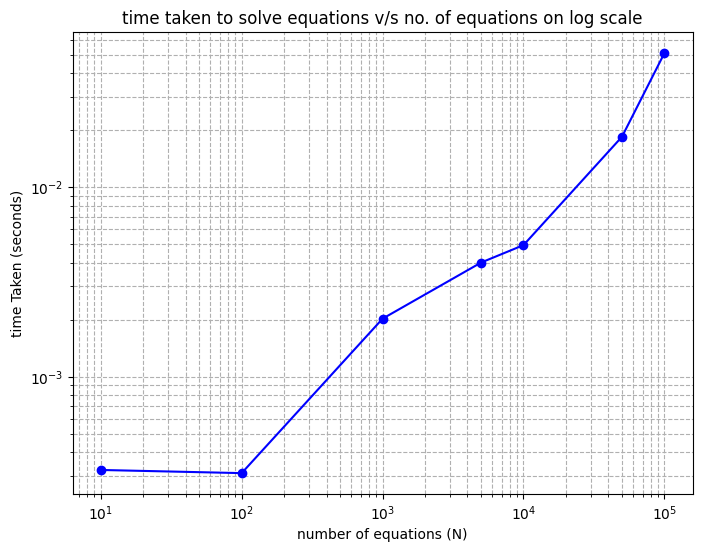

In [ ]:
def measure_efficiency():
    D = 10
    #defining set no. of feature to use it later in defining X
    values_of_N = [10, 100, 1000, 5000, 10000, 50000, 100000]
    # different values of N to plot on loog Scale
    times = []
    # to store different vales of time taken to plot

    for N in values_of_N:
        X = np.random.randn(N, D)
        #generating random matrix of dimension of D features and N equations

        start_time = time.time()
         # Starting the timer
        np.linalg.pinv(X)
        # Solving equations
        #inspiration 1
        end_time = time.time()
        # stoping the timer

        time_taken = end_time - start_time
        #time calculating
        times.append(time_taken)
        # adding element to time array


        print(f"Time taken : N = {N}: {time_taken:.6f} seconds")
        #.6f (display only 6 digits from decimal) googled
        # inspiration 2

    plt.figure(figsize=(8, 6))
    #creating blank page to draw graph of sizr 8 units wids and 6 units tall
    plt.loglog(values_of_N, times, marker='o', linestyle='-', color='b')
    # plot of log scale , x-axis = values_of_N , y-axis = time array, marker - symbol used to mark data point, linestyle - symbol used to connect data points, colour - b for blue
    # inspiration 3
    plt.xlabel('number of equations (N)')
    plt.ylabel('time Taken (seconds)')
    #labeling axes
    plt.title('time taken to solve equations v/s no. of equations on log scale')
    # descirbing plot (labeling)
    plt.grid(True, which="both", ls="--")
    # displaying gridlines to easily understand plot lines , which - both axes, linestyle
    plt.show()
    # displaying the plot made

measure_efficiency()


1. Chatgptied it as I didn't know what is was and its syntax
2. https://images.app.goo.gl/tU4eDEKojMpEpjt4A
3. chatgptied plot the values of
N against the time taken on a log-log scale usign matplotlib in python

inpirations needed for ploting , np.linalg.piv() function and to print decimals , explanation provided below line of code

my observations would be  as the no. of equations increased (N) the time taken to solve them increased drastically it might be due to computational power and memory constraints

# 4th step



In [ ]:
def nrmse_calculation(t, y):
  #we have calculate root mean squared error and normalize it giving us nrmse

  error = t-y
  #calculating error between actual values and predicted values

  squared_e = error ** 2
  # squaring the error

  mean_se = np.mean(squared_e)
  #calculating mean of squraed_e

  root_mse = np.sqrt(mean_se)
  #calculating root of mean_se

  range_of_t = np.max(t) - np.min(t)
  #calculating to normalize
  #inspiration 1

  nrmse = root_mse / range_of_t
  # normalizing rmse using range of t
  # normalization concept suggested by Chatgpt

  return nrmse




1. https://images.app.goo.gl/ow3koTSoRzcY3FwH7

my observations would be I thought I will have to square the error by numpy , but using (**) helped me , I have learned that in CS101 but I just forgot about it

# 5th step

In [ ]:
def gradient(X, w, t):

    y = X @ w
    #matrix multiplication between X and w gives predicted output y not considering bias

    error = y - t
    #calculating error


    N = X.shape[0]
    #rows/equations in X

    gradient_curr = (2 / N) * (X.T @ error)
    #gradient : (2/N * X^T * error)
    #transpose inspiration : 1

    return gradient_curr

1. https://images.app.goo.gl/n8erpbCWTLC9J4Aa7

My observations would be that it calculate gradient of mSE to adjust weights , the function calculates gradient but it's performance/efficiency can only be known when used with larger datasets

# 6th step

In [ ]:
def L2_norm_gradient(w):

  grad_L2 = 2 * w
  #as gradient of L2 norm is weight*2
  #inspiration : 1

  return grad_L2


1. chatgptied it as I didnt get the question after reading it for 1st time

well I didnt observe much in this , but I got know how to calculate L2 norm gradient and L2 norm  is  summmation of squared weights

# 7th step

In [ ]:
def L1_norm_gradient(w):

  grad_L1 = np.sign(w)
  # gradient of L1 norm is sign of each weight

  return grad_L1


I didnt observe much in this also , but I got know how to calculate L1 norm gradient and L1 norm is summmation of weights

# 8th step

In [ ]:
def gradient_descent(X, t, λ1, λ2, l_rate=0.01, iterations=1000, tolerance=1e-6):

    N, D = X.shape
    # getting dimensions as already done in prev questions
    w = np.random.randn(D)
    #initializing weights randomly , we get better weights after regualrization

    # looping to find better weights
    for iter in range(iterations):

        y = X @ w
        #calculating predicted output as already done in prev questions

        grad_MSE = (2 / N) * X.T @ (y - t)
        #MSE gradiend as already done in prev questions


        grad_L1 = λ1 * np.sign(w)
        grad_L2 = 2 * λ2 * w
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_MSE + grad_L1 + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:
            print(f'Converging after {iteration+1} cycles')
            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop
        #inspiration : 1
        w = w_new
        #updating new weight

    return w


1. chatgptied beacause I didn't know about the stopping criterion(tolerance) maybe I missied the class, so I just chatgptied for it

Observation : we have to find balance in both the concepts of learning rate as well as stopping criterion, if learing rate very high the it can directly bypass the minima and of too low then very slow learing and both of the cases can be problematic. and somewhat similiar problems for tolerance value. This question was mostly mixing of questions before it in terms of concept

# 9th step

In [ ]:
import matplotlib.pyplot as plt

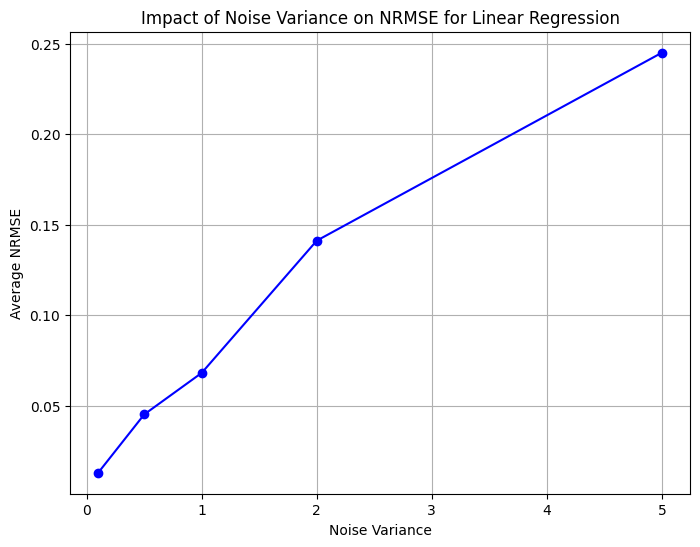

In [ ]:
def gradient_descent(X, t, w_init, λ1, λ2, l_rate=0.01, iterations=1000, tolerance=1e-6):

    N, D = X.shape
    # getting dimensions as already done in prev questions
    w = w_init.copy()
    #initializing weights randomly , we get better weights after regualrization

    # looping to find better weights
    for iter in range(iterations):

        y = X @ w
        #calculating predicted output as already done in prev questions

        grad_MSE = (2 / N) * X.T @ (y - t)
        #MSE gradiend as already done in prev questions


        grad_L1 = λ1 * np.sign(w)
        grad_L2 = 2 * λ2 * w
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_MSE + grad_L1 + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:

            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating new weight

    return w

# Define function to compute NRMSE
def nrmse_calculation(t, y):
  #we have calculate root mean squared error and normalize it giving us nrmse

  error = t-y
  #calculating error between actual values and predicted values

  squared_e = error ** 2
  # squaring the error

  mean_se = np.mean(squared_e)
  #calculating mean of squraed_e

  root_mse = np.sqrt(mean_se)
  #calculating root of mean_se

  range_of_t = np.max(t) - np.min(t)
  #calculating to normalize
  #inspiration 1

  nrmse = root_mse / range_of_t
  # normalizing rmse using range of t
  # normalization concept suggested by Chatgpt

  return nrmse

## MAIN STARTING FROM NOW EVERYTHING ABOVE IS COPIED FROM ABOVE QUESTION
np.random.seed(42)
#seeding so that we will get same random number every time this code is run , which will give us same results
#inspiration : 1

N = 100
#no. of rows/datapoints

D = 10
# no. of columns/ features

values_of_sigma = [0.1, 0.5, 1.0, 2.0, 5.0]
# values of variance(sigma) of niose

runs = 5
#no times to iterate for a particular value of variance(sigma)

G = np.identity(D)
#creating identity matrix

l_rate = 0.01
# learining rate

λ1 =0.01
#regularization term of L1

λ2 = 0.01
#regularization term of L2

average_nrmse_values = []
#array to save average nrmse of each variance which is main topic of the question


for sigma in values_of_sigma:
    #looping over variance values

    nrmse_results = []
    #saving nrmse values(not the average value) of  the 5 loops over a variance


    for _ in range(runs):
        #THE five loops over a variance which we were talking about

        X = np.random.randn(N, D) @ G
        #creating the data matrix

        w_true = np.random.randn(D)
        # weights to calculate the target vector(true values which we will compare with the perdicted values)

        t = X.dot(w_true) + np.random.normal(0, sigma, size=N)
        # Adding the noise in the target vector which is also the main topic of the question , we will get different variance(sigma) values when outer loop iterates

        split_index = int(0.8 * N)
        #as N(data points) is 100 , it is splitted in 80 20, where 80 will be training data and 20 is the validation set, data with which the predicted values will be compared

        X_train = X[:split_index]
        X_val = X[split_index:]
        #spliting data matrix for training and validation

        t_train = t[:split_index]
        t_val = t[split_index:]
        #spliting target vector in training and validation

        w_train = np.random.randn(D)
        #weights for training

        w_trained = gradient_descent(X_train, t_train, w_train, λ1, λ2, l_rate)
        #the autual training of weights, gradient descent function is used which defined above

        t_pred = X_val.dot(w_trained)
        #predicting the target values which then will be compared to the actual target values

        nrmse_value = nrmse_calculation(t_val, t_pred)
        #calculating nrmse value which is just the function call wiht arguments of predicted and actual target vectors, function is defined above

        nrmse_results.append(nrmse_value)
        #adding the calculated value to array of which the average will be calculated

    average_nrmse_values.append(np.mean(nrmse_results))
    #calculating average nrmse value which will be plotted as given in question


plt.figure(figsize=(8, 6))
plt.plot(values_of_sigma, average_nrmse_values, marker='o', linestyle='-', color='b')
#creating plot with x-axis as values_of_sigma and y-axis as average_nrmse_values , with data point marked as  "o" and linestyle of line connecting data points is '-' with blue color. 8 units wide and 6 units long

plt.xlabel('Noise Variance')
plt.ylabel('Average NRMSE')
#naming the axes

plt.title('Impact of Noise Variance on NRMSE for Linear Regression')
#naming the plot

plt.grid(True)
#creating grid for better visualization

plt.show()
#printing plot


1.https://images.app.goo.gl/wnnDQZAZRWUPJXxG8

obsevation : not exactly a observation as we can already infer this with writing all the code , but after plotting relationship between noise variance and average nrmse we can clearly see that when noise variance is small the nrmse is also small but as noise variance increses the model performs poorly and nrmse increses almoest linearly

after it became very easy as functions like nrmse_calculation and gradient_descent were already defined so I just copy pasted and used them. Then it was just steps written in question create data matrix, weights, target vector with noise, then divide data matrix into training set and validation set, train model, get the weights, predict the values, calculated average nrmse for each noise variance and plot them. And also in most important and complex steps we just have to use the functions to do the calculation.


From this we can understand the importance of breaking down question into small step(Functions) , then it just becomes easier

# 10th step

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


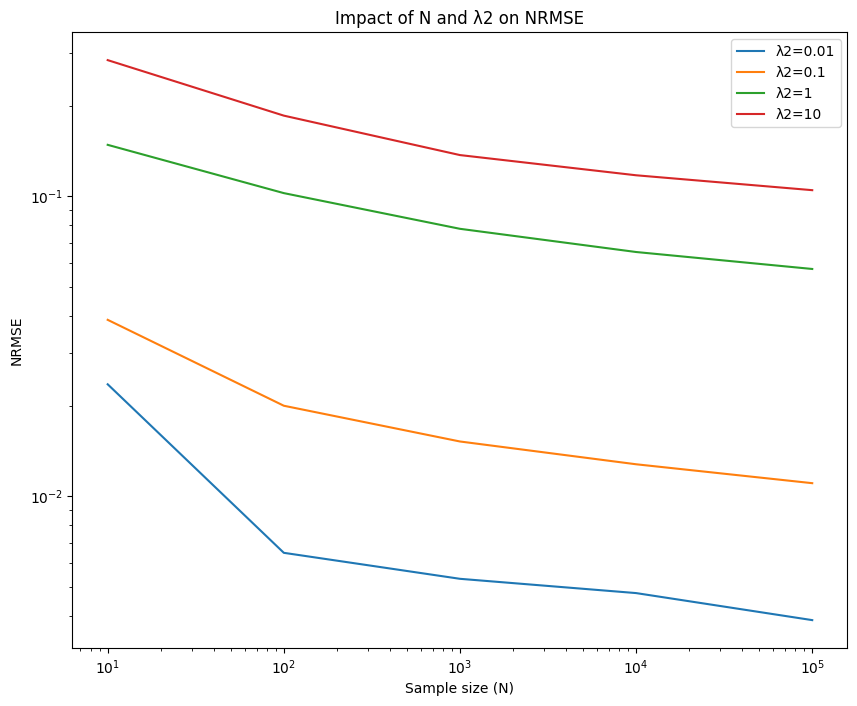

In [ ]:
def gradient_descent(X, t, λ2, l_rate=0.01, iterations=1000, tolerance=1e-6):

    N, D = X.shape
    # getting dimensions as already done in prev questions
    w = np.random.randn(D)
    #initializing weights randomly , we get better weights after regualrization

    # looping to find better weights
    for iter in range(iterations):

        y = X @ w
        #calculating predicted output as already done in prev questions

        grad_MSE = (2 / N) * X.T @ (y - t)
        #MSE gradiend as already done in prev questions

        grad_L2 = 2 * λ2 * w
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_MSE + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:

            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating new weight

    return w

# Define function to compute NRMSE
def nrmse_calculation(t, y):
  #we have calculate root mean squared error and normalize it giving us nrmse

  error = t-y
  #calculating error between actual values and predicted values

  squared_e = error ** 2
  # squaring the error

  mean_se = np.mean(squared_e)
  #calculating mean of squraed_e

  root_mse = np.sqrt(mean_se)
  #calculating root of mean_se

  range_of_t = np.max(t) - np.min(t)
  #calculating to normalize
  #inspiration 1

  nrmse = root_mse / range_of_t
  # normalizing rmse using range of t
  # normalization concept suggested by Chatgpt

  return nrmse

#MAIN COE STARTING NOW
values_of_N = [10, 100, 1000, 10000, 100000]
#values for N at log scale

lambda2_values = [0.01, 0.1, 1, 10]
#values for lambda2 at log scale

results = np.zeros((len(values_of_N), len(lambda2_values)))
#creating an 2D array to store the results with no. of rows being size of size of values_of_N array(5) and no. of columns being size of lambda2_values array (5), 2d array of total 25 elements

D = 10
#number of features or also number of columns in data matrix

sigma = 0.1
#fixed noise variance as given in question

G = np.eye(D)
#fixed generator matrix as given in the question

for i, N in enumerate(values_of_N):
    #outer loop looping over values_of_N , enumerate() to get index (i)

    for j, lambda2 in enumerate(lambda2_values):
        #inner loop looping over lambda2_values , enumerate() to get index (j)

        nrmse_results = []
        #saving nrmse values(not the average value) of  the 5 loops over a variance as done in previous question

        for k in range(5):
            #THE innermost loop which for 5 time for each combination of N and lamda2

            X = np.random.randn(N, D) @ G
            #creating the data matrix of N data points and D features

            w_true = np.random.randn(D)
            # weights to calculate the target vector(true values which we will compare with the perdicted values)

            t = X @ w_true + np.random.normal(0, sigma, N)
            #creating target vector t with noise of constant variance

            w = gradient_descent(X, t, lambda2)
            #the autual training of weights, gradient descent function is used which defined above

            y = X @ w
            #calculating the predicted values which then will be compared with actual values of validation and calculated nrmse

            nrmse_value = nrmse_calculation(t, y)
            #calculating nrmse value which is just the function call wiht arguments of predicted and actual target vectors, function is defined above

            nrmse_results.append(nrmse_value)
            #adding the calculated value to array of which the average will be calculated

        results[i, j] = np.mean(nrmse_results)
        #storing mean nrmse value which we gained after 5 loops for each combination


plt.figure(figsize=(10, 8))
#size of plot 10 units wide , 8 units long

for i, lambda2 in enumerate(lambda2_values):
    #loops each lambda also giving its index through enumerate()

    plt.loglog(values_of_N, results[:, i], label=f'λ2={lambda2}')
    #plots samples sizes/no. of data points(N) in x-axis , nrmse as y-axis as nmrse were stored in a 2D array named results[k,l] where N varied through 'k' and that's why it is written as results[:, i] for y axis, for loop i , it plots the nrmse for for different N '[:]' and ith lambda2 [i]. also giving it label of lambda2
    #inspiration : 2
plt.xlabel('Sample size (N)')
plt.ylabel('NRMSE')
#labeling axes

plt.title('Impact of N and λ2 on NRMSE')
#labeling plot

plt.legend()
# showing legends
plt.show()
# printing plot


plotting only for 4 lambdas and for lambda = 100 all other lambda plots are compressed down as shown below

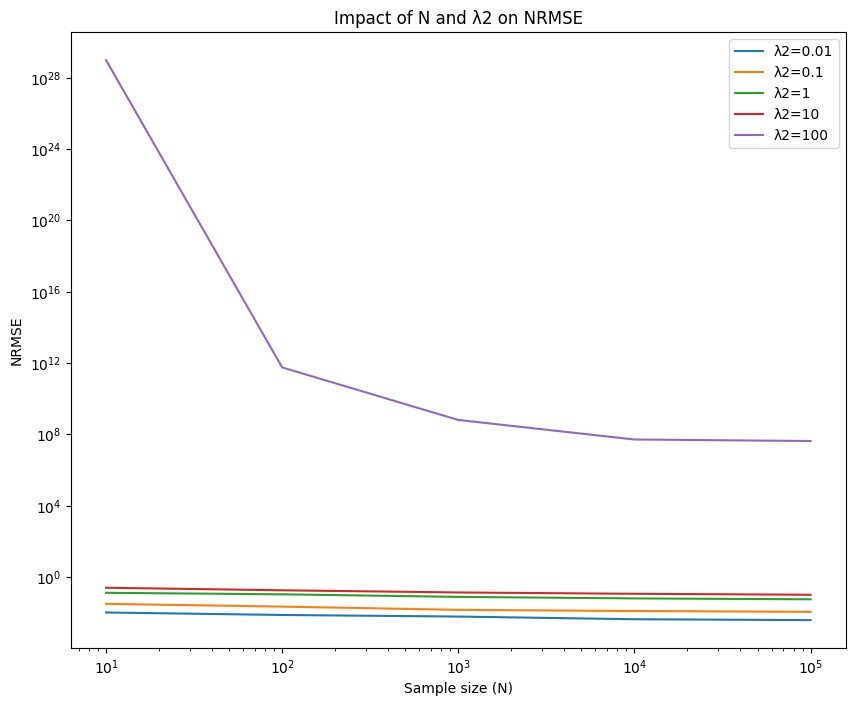

In [ ]:
def gradient_descent(X, t, λ2, l_rate=0.01, iterations=1000, tolerance=1e-6):

    N, D = X.shape
    # getting dimensions as already done in prev questions
    w = np.random.randn(D)
    #initializing weights randomly , we get better weights after regualrization

    # looping to find better weights
    for iter in range(iterations):

        y = X @ w
        #calculating predicted output as already done in prev questions

        grad_MSE = (2 / N) * X.T @ (y - t)
        #MSE gradiend as already done in prev questions

        grad_L2 = 2 * λ2 * w
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_MSE + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:

            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating new weight

    return w

# Define function to compute NRMSE
def nrmse_calculation(t, y):
  #we have calculate root mean squared error and normalize it giving us nrmse

  error = t-y
  #calculating error between actual values and predicted values

  squared_e = error ** 2
  # squaring the error

  mean_se = np.mean(squared_e)
  #calculating mean of squraed_e

  root_mse = np.sqrt(mean_se)
  #calculating root of mean_se

  range_of_t = np.max(t) - np.min(t)
  #calculating to normalize
  #inspiration 1

  nrmse = root_mse / range_of_t
  # normalizing rmse using range of t
  # normalization concept suggested by Chatgpt

  return nrmse

#MAIN CODE STARTING NOW
values_of_N = [10, 100, 1000, 10000, 100000]
#values for N at log scale

lambda2_values = [0.01, 0.1, 1, 10, 100]
#values for lambda2 at log scale

results = np.zeros((len(values_of_N), len(lambda2_values)))
#creating an 2D array to store the results with no. of rows being size of size of values_of_N array(5) and no. of columns being size of lambda2_values array (5), 2d array of total 25 elements

D = 10
#number of features or also number of columns in data matrix

sigma = 0.1
#fixed noise variance as given in question

G = np.eye(D)
#fixed generator matrix as given in the question

for i, N in enumerate(values_of_N):
    #outer loop looping over values_of_N , enumerate() to get index (i)

    for j, lambda2 in enumerate(lambda2_values):
        #inner loop looping over lambda2_values , enumerate() to get index (j)

        nrmse_results = []
        #saving nrmse values(not the average value) of  the 5 loops over a variance as done in previous question

        for k in range(5):
            #THE innermost loop which for 5 time for each combination of N and lamda2

            X = np.random.randn(N, D) @ G
            #creating the data matrix of N data points and D features

            w_true = np.random.randn(D)
            # weights to calculate the target vector(true values which we will compare with the perdicted values)

            t = X @ w_true + np.random.normal(0, sigma, N)
            #creating target vector t with noise of constant variance

            w = gradient_descent(X, t, lambda2)
            #the autual training of weights, gradient descent function is used which defined above

            y = X @ w
            #calculating the predicted values which then will be compared with actual values of validation and calculated nrmse

            nrmse_value = nrmse_calculation(t, y)
            #calculating nrmse value which is just the function call wiht arguments of predicted and actual target vectors, function is defined above

            nrmse_results.append(nrmse_value)
            #adding the calculated value to array of which the average will be calculated

        results[i, j] = np.mean(nrmse_results)
        #storing mean nrmse value which we gained after 5 loops for each combination


plt.figure(figsize=(10, 8))
#size of plot 10 units wide , 8 units long

for i, lambda2 in enumerate(lambda2_values):
    #loops each lambda also giving its index through enumerate()

    plt.loglog(values_of_N, results[:, i], label=f'λ2={lambda2}')
    #plots samples sizes/no. of data points(N) in x-axis , nrmse as y-axis as nmrse were stored in a 2D array named results[k,l] where N varied through 'k' and that's why it is written as results[:, i] for y axis, for loop i , it plots the nrmse for for different N '[:]' and ith lambda2 [i]. also giving it label of lambda2
    #inspiration : 2

plt.xlabel('Sample size (N)')
plt.ylabel('NRMSE')
#labeling axes

plt.title('Impact of N and λ2 on NRMSE')
#labeling plot

plt.legend()
# showing legends
plt.show()
# printing plot


see how all graphs are compressed dowm except lambda = 100

1. https://images.app.goo.gl/2SDm6LPLnYeqEWUz6 and also help of chatgptas I didn't know how to get index
2. plotting it was very challenging so I tried to do it some ways but chatgpting really helped  on how should I plot for this question and it gave me idea for loop over lambda2 values

obervation : as we can see that as lambda increases so does the nmrse as due to over regularization , making model very simple and we can see the drastic increase in nrmse when lambda = 100, and similiarly we also observe that sample size has inverse relation with nrmse as the no. of data points increases nrmse decreases.


# 11th step

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

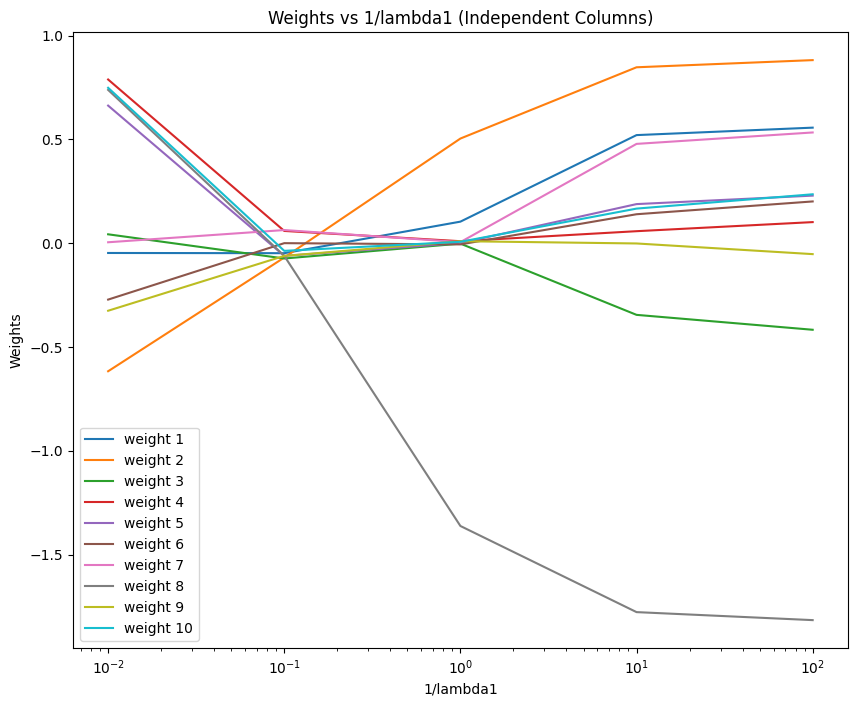

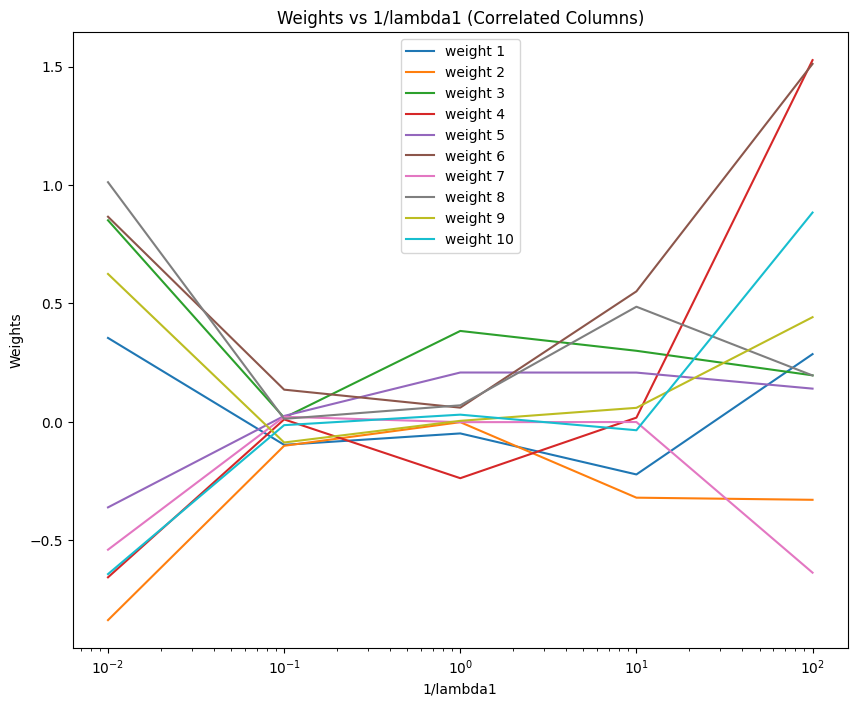

In [ ]:
def gradient_descent(X, t, λ1, l_rate=0.01, iterations=1000, tolerance=1e-6):

    N, D = X.shape
    # getting dimensions as already done in prev questions
    w = np.random.randn(D)
    #initializing weights randomly , we get better weights after regualrization

    # looping to find better weights
    for iter in range(iterations):

        y = X @ w
        #calculating predicted output as already done in prev questions

        grad_MSE = (2 / N) * X.T @ (y - t)
        #MSE gradiend as already done in prev questions

        grad_L1 = λ1 * np.sign(w)
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_MSE + grad_L1
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:

            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating new weight

    return w

# MAIN CODE STARTS HERE

N = 100
#sample size/ no. of data points/no. of rows in data matrix

D = 10
#no. of features/ no. of columns in data matrix

sigma = 0.1
#noise variance, it wasnt asked in the question but continueing from last question

values_of_lambda1 = np.logspace(-2, 2, 5)
# generating 5 values of lambda1 in log scale from 0.01 to 100, as in np.logspace(-2, 2, 5), here argument -2 is 10^-2 = 0.01 and 2 is 10^2 =  100 , and 5 is telling how many values between them
#inspiration : 1

results = np.zeros((len(values_of_lambda1), D))
# generating array of size [5,10] filled with only zeros for every element , 5 is no. of values of lambda1 and 10 is no. of features which is also equal to no. of weights

np.random.seed(0)
#sedding to get same random values to get same results whenever run

X = np.random.randn(N, D)
#generating data matrix of size N rows and D columns

w_true = np.random.randn(D)
#weights to calculate the target vector(true values which we will compare with the perdicted values)

t = X @ w_true + np.random.normal(0, sigma, N)
#creating target vector t with noise of constant variance of N size


for i, lambda1 in enumerate(values_of_lambda1):
    #loop over values of lambda1 to see how it affects the weights and some of the weights are being eliminated of not

    w = gradient_descent(X, t, lambda1)
    #training with lamda1 regularization parameter as already done many times in above questions

    results[i, :] = w
    #storing the values the weights, in results[i, :] , the first argument "i" tells us the index of ongoing lambda1 (ith row), and second argument ":" all the columns , to visualize lets assume i=3 so in 3rd row all the weights are being saved as w1 position is (3,1) (3rd row, 1st column) and w6 position is (3,6) (3rd row, 6th column)

plt.figure(figsize=(10, 8))
#plot of size 10 units wide and 8 units in length

for j in range(D):
    #loops of 10 times(D) which is also equal to no. of weights, which is also the no. of feautures

    plt.plot(1 / values_of_lambda1, results[:, j], label=f'weight {j+1}')
     #plots 1 / values_of_lambda1 in x-axis , value of weights as y-axis as weights were stored in a 2D array named results[k,l] where lambda1 varied through 'k' and that's why it is written as results[:, i] for y axis, for loop i , it plots weight(ith weight/ column) for different values of lambda1 ([:], rows)

plt.xscale('log')
#scale of x-axis

plt.xlabel('1/lambda1')
plt.ylabel('Weights')
#labeling axes

plt.title('Weights vs 1/lambda1 (Independent Columns)')
#labeling plot

plt.legend(loc='best')
plt.show()
#showing legend and printing plot

#NOW WITH CORRELATED COLUMNS

correlation_matrix = np.random.randn(D, D)
#generating correlation matrix

X_corr = X @ correlation_matrix
#matrix multiplication of X(N*D) and correlation matrix gives a matrix whose columns are not independent as after multiplying X with correlation matrix , every column of new matrix is now combination of columns of original data matrix(X)

results_corr = np.zeros((len(values_of_lambda1), D))
# generating array of size [5,10] filled with only zeros for every element , 5 is no. of values of lambda1 and 10 is no. of features which is also equal to no. of weights


for i, lambda1 in enumerate(values_of_lambda1):
    #loop over values of lambda1 to see how it affects the weights and some of the weights are being eliminated or not

    w_corr = gradient_descent(X_corr, t, lambda1)
    #training with lamda1 regularization parameter as already done in many times in above questions

    results_corr[i, :] = w_corr
    #storing the values the weights, in results[i, :] , the first argument "i" tells us the index of ongoing lambda1 (ith row), and second argument ":" all the columns , to visualize lets assume i=3 so in 3rd row all the weights are being saved as w1 position is (3,1) (3rd row, 1st column) and w6 position is (3,6) (3rd row, 6th column)

plt.figure(figsize=(10, 8))
#plot of size 10 units wide and 8 units in length

for j in range(D):
    #loops of 10 times(D) which is also equal to no. of weights, which is also the no. of feautures

    plt.plot(1 / values_of_lambda1, results_corr[:, j], label=f'weight {j+1}')
     #plots 1 / values_of_lambda1 in x-axis , value of weights as y-axis as weights were stored in a 2D array named results[k,l] where lambda1 varied through 'k' and that's why it is written as results[:, i] for y axis, for loop i , it plots weight(ith weight/ column) for different values of lambda1 ([:], rows)

plt.xscale('log')
#setting scale of x-axis as logarithmic

plt.xlabel('1/lambda1')
plt.ylabel('Weights')
#labeling axes

plt.title('Weights vs 1/lambda1 (Correlated Columns)')
#labeling plot

plt.legend(loc='best')
plt.show()
#showing legends and printing plots


1.https://images.app.goo.gl/rH3gWKBvbHXxAR8k6 , https://images.app.goo.gl/WcBQk1nBRoh6hzFz8

values of lamda1 are taken on log scale as on linear scale there isn't much difference observed in the results and also inspired from previous question, question was similiar as most of the process was same as in define data matrix and all the other things , loop over for different values for lamda1 in that loop, train model, get the final weights , store them in a 2d array and plots them . after that X was turned into a correlation matrix and exact same steps were followed

from the plots we can observe that for independent columns, many of the features goes to zero as lambda1 increases, but correlated/dependent columns many weights doesn't go to zero as compared to before , this might be due the columns being similiar , as the features are interdependent , singling out a particular feature to make it zero becomes hard which leads to weights of not becoming zero, this might be wrong




# 12th step

Weights using elastic net regularization :  [ 1.69206263e+00  1.08526381e+00 -1.98396264e-05 -3.12477010e-01
  4.66341137e-01 -1.05018453e-02  5.53821450e-01  4.50081424e-01
  8.73586629e-01 -4.65541502e-01]


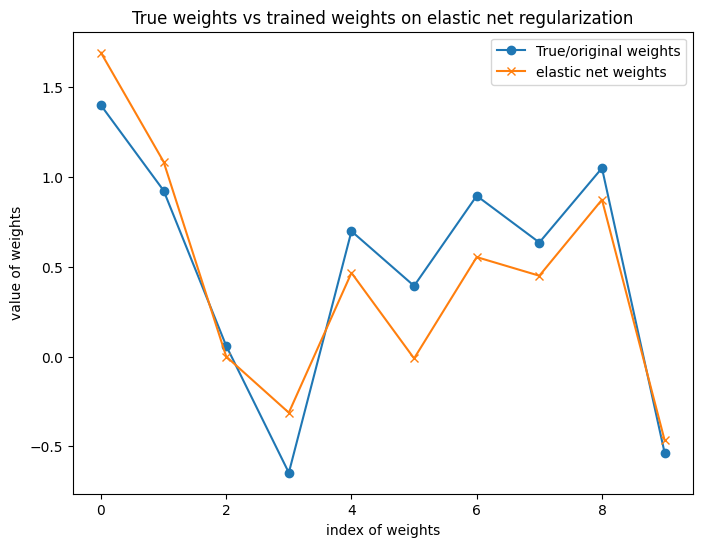

Weights using elastic net regularization :  [ 0.87139664  0.60753365  0.13724256 -1.01798075  0.52907919  0.11697483
  0.98767707  0.19775965  0.89986056 -0.62133343]


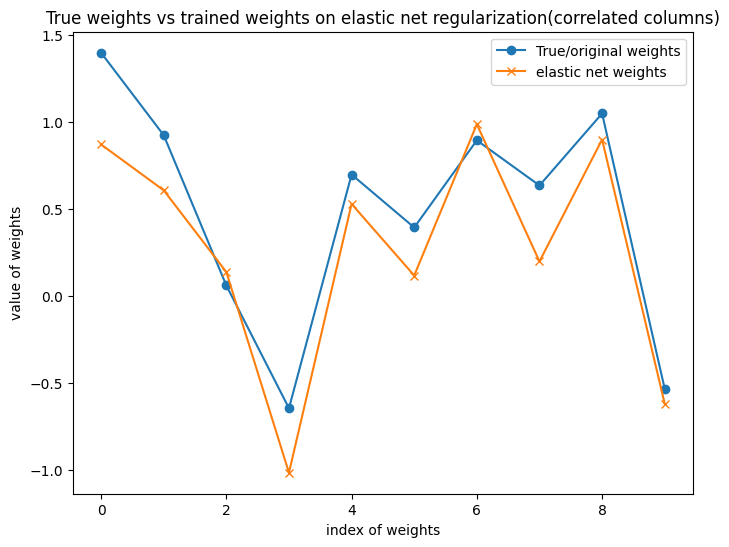

In [ ]:
def gradient_descent(X, t, lambda1, lambda2, l_rate=0.01, iterations=1000, tolerance=1e-6):

    N, D = X.shape
    # getting dimensions as already done in prev questions
    w = np.random.randn(D)
    #initializing weights randomly , we get better weights after regualrization

    # looping to find better weights
    for iter in range(iterations):

        y = X @ w
        #calculating predicted output as already done in prev questions

        grad_MSE = (2 / N) * X.T @ (y - t)
        #MSE gradiend as already done in prev questions

        grad_L1 = lambda1 * np.sign(w)
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        grad_L2 = 2 * lambda2 * w
        #calculating gradient of L2 and L1 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_MSE + grad_L1 + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:
            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating new weight

    return w

# MAIN CODE STARTS HERE

N = 100
#sample size/ no. of data points/no. of rows in data matrix

D = 10
#no. of features/ no. of columns in data matrix

sigma = 0.1
#noise variance, it wasnt asked in the question but continueing from last question

lambda1 = 0.05
#value of L1 regularization parameter

lambda2 = 0.05
#value of L2 regularization parameter

# results = np.zeros((len(values_of_lambda1), D))
# generating array of size [5,10] filled with only zeros for every element , 5 is no. of values of lambda1 and 10 is no. of features which is also equal to no. of weights

np.random.seed(42)
#sedding to get same random values to get same results whenever run

X = np.random.randn(N, D)
#generating data matrix of size N rows and D columns

w_true = np.random.randn(D)
#weights to calculate the target vector(true values which we will compare with the perdicted values)

t = X @ w_true + np.random.normal(0, sigma, N)
#generating target vector

elastic_net_weights_ = gradient_descent(X, t, lambda1, lambda2)
#training model and getting them by using elastic net

print("Weights using elastic net regularization : ", elastic_net_weights)
#printing the trained weights

plt.figure(figsize=(8, 6))
#plot of size 8 units wide and 6 units in length

plt.plot(w_true, label = "True/original weights", marker = 'o')
#plotting the original weights

plt.plot(elastic_net_weights, label = "elastic net weights",marker = 'x' )
#trained weights on elastic net regularization

plt.xlabel('index of weights')
plt.ylabel('value of weights')
#labeling axes

plt.title('True weights vs trained weights on elastic net regularization')
#labeling plot

plt.legend(loc='best')
plt.show()
#showing legends and printing plots

#NOW WITH CORRELATED COLUMNS

correlation_matrix = np.random.randn(D, D)
#generating correlation matrix

X_corr = X @ correlation_matrix
#matrix multiplication of X(N*D) and correlation matrix gives a matrix whose columns are not independent as after multiplying X with correlation matrix , every column of new matrix is now combination of columns of original data matrix(X)

t1 = X_corr @ w_true + np.random.normal(0, sigma, N)
#generating target vector

elastic_net_weights_corr = gradient_descent(X_corr, t1, lambda1, lambda2)
#training model and getting them by using elastic net

print("Weights using elastic net regularization : ", elastic_net_weights_corr)
#printing the trained weights

plt.figure(figsize=(8, 6))
#plot of size 8 units wide and 6 units in length

plt.plot(w_true, label = "True/original weights", marker = 'o')
#plotting the original weights

plt.plot(elastic_net_weights_corr, label = "elastic net weights",marker = 'x' )
#trained weights on elastic net regularization

plt.xlabel('index of weights')
plt.ylabel('value of weights')
#labeling axes

plt.title('True weights vs trained weights on elastic net regularization(correlated columns)')
#labeling plot

plt.legend(loc='best')
plt.show()
#showing legends and printing plots


almost all the concepts/functions used here were already used/done in previous parts so it wasn't hard .

This time we just used both lambda1 and lambda2 ,  in L1 regularization some weights goes all the way to zero while in L2 regularization it only shrinks but doesnt make any weights to go to zero, in elastic net we use combine both so we get best of both worlds. as we have already seen in above question that training weights of correlated matrix is hard, but in elastic net , it group the correlated feature keeping all small or large together.

# 13th step

In [ ]:
def binary_classification_output(X, w, sigma):

    N = X.shape[0]
     #sample size/no. of rows

    output = X @ w + np.random.normal(0, sigma, N)
    #generating output and adding some noise with variance sigma

    t = np.zeros(N)
    #initialising  target vector which will contain output which are classified to 0 or 1

    for i, output in enumerate(output):
      if output > 0.5 :
        t[i] = 1
   #classifying/categorising outpurt into 0 or 1 , if output is greater than 0.5 then it is categorised as 1 or else 0

    return t

it was simple binary classification function, each row of data marix (one sample) is multiplied by weight vector which results in a nuumber and some noise is also added to it, if it is > 0.5 then it belongs to class 1 or else class 0

# step 14

In [ ]:
def sigmoid(z):

    sig_value = 1 / (1 + np.exp(-z))
    #putting the value in sigmoid function which will return probabilities between 0 and 1
    #inspiration : 1

    return sig_value


def binary_cross_entropy_gradient(X, t, w):

    N = X.shape[0]
    #sample size/ no. of rows

    z = X @ w
    #calsculating linear combination of input and weights

    y = sigmoid(z)
    #calling function sigmoid and giving z as argument which will return probabilities between 0 and 1

    error = y - t
    #difference between predicted probabilties and actual values

    gradient = (1 / N) * X.T @ error
    # X.T @ error is computing the sum over all samples
    #inspiration : 2

    return gradient

1. https://images.app.goo.gl/eiVbnU69ihfia7hz6




# 15th step

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

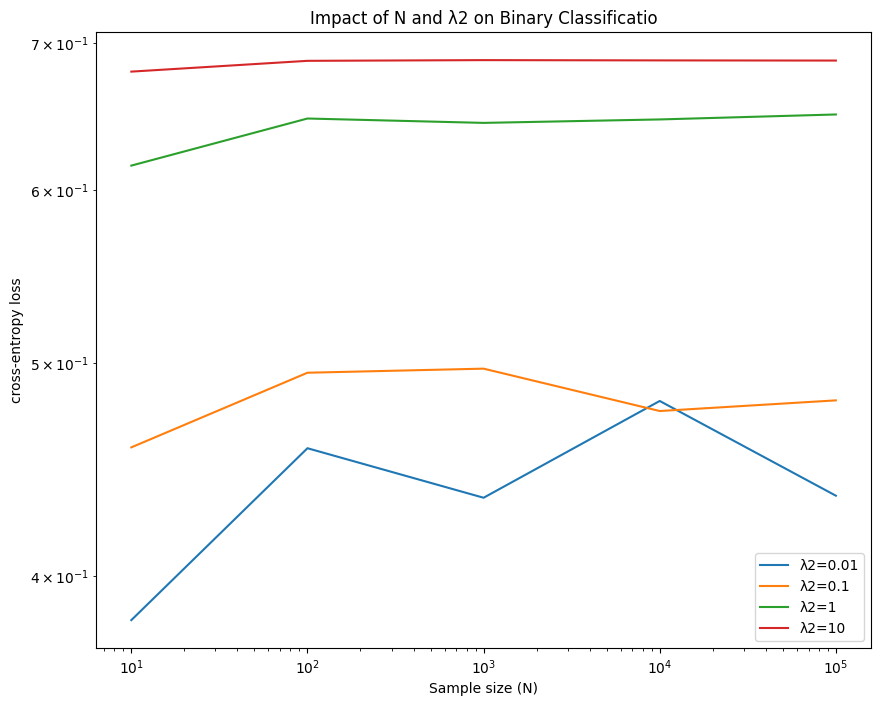

In [ ]:
def sigmoid(z):

    sig_value = 1 / (1 + np.exp(-z))
    #putting the value in sigmoid function which will return probabilities between 0 and 1
    #inspiration : 1

    return sig_value

def binary_cross_entropy(t, y):
    #in 10th question we used NMRSE but in this question we will use binary cross entropy ( it is loss function of binary classification)

    cross_entropy = -np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))
    #calculating binary cross entropy loss using formula
    #inspiration : 1

    return cross_entropy

def gradient_descent_binary(X, t, λ2, l_rate=0.01, iterations=1000, tolerance=1e-6):
    N, D = X.shape
    #getting no.of rows/sample size (N), no. of features/no. of weights (D)

    w = np.random.randn(D)
    #creating weights which will get trained

    for iter in range(iterations):
        z = X @ w
        #creating output z by doing matrix multiplication of X and w which will we then send to sigmoid function to get probabilities

        y = sigmoid(z)
        #calling function sigmoid and giving z as argument which will return probabilities between 0 and 1

        error = y - t
        #difference between predicted probabilties and actual values

        grad_cross_entropy = (1 / N) * X.T @ error
        #calculating gradient as already done in previous question

        grad_L2 = 2 * λ2 * w
        #calculating gradient of L2 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_cross_entropy + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:
            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating weights

    return w

# MAIN CODE STARTING FROM HERE

np.random.seed(42)

values_of_N = [10, 100, 1000, 10000, 100000]
#values for N at log scale

lambda2_values = [0.01, 0.1, 1, 10]
#values for lambda2 at log scale

results = np.zeros((len(values_of_N), len(lambda2_values)))
#creating an 2D array to store the results with no. of rows being size of size of values_of_N array(5) and no. of columns being size of lambda2_values array (5), 2d array of total 25 elements

D = 10
#number of features or also number of columns in data matrix

sigma = 0.1
#fixed noise variance as given in question

G = np.eye(D)
#fixed generator matrix as given in the question

for i, N in enumerate(values_of_N):
    #outer loop looping over values_of_N , enumerate() to get index (i)

    for j, lambda2 in enumerate(lambda2_values):
        #inner loop looping over lambda2_values , enumerate() to get index (j)

        cross_entropy_results = []
        #saving cross-entropy values(not the average value) of  the 5 loops

        for k in range(5):
            #THE innermost loop which for 5 time for each combination of N and lamda2

            X = np.random.randn(N, D) @ G
            #creating the data matrix of N data points and D features

            w_true = np.random.randn(D)
            # weights to calculate the target vector(true values which we will compare with the perdicted values)

            t = sigmoid(X @ w_true + np.random.normal(0, sigma, N))
            #creating target vector t with noise of constant variance

            for l, output in enumerate(t):
                if output > 0.5 :
                    t[i] = 1
            #classifying/categorising outpurt into 0 or 1 , if output is greater than 0.5 then it is categorised as 1 or else 0

            w = gradient_descent_binary(X, t, lambda2)
            #the autual training of weights, gradient descent function is used which defined above

            y = sigmoid(X @ w)
            #calculating the predicted values which then will be compared with actual values of validation and calculated cross-entropy

            cross_entropy_value = binary_cross_entropy(t, y)
            #calculating cross-entropy value which is just the function call wiht arguments of predicted and actual target vectors, function is defined above

            cross_entropy_results.append(cross_entropy_value)
            #adding the calculated value to array of which the average will be calculated

        results[i, j] = np.mean(cross_entropy_results)
        #storing mean nrmse value which we gained after 5 loops for each combination

plt.figure(figsize=(10, 8))
#size of plot 10 units wide , 8 units long

for i, lambda2 in enumerate(lambda2_values):
    #loops each lambda also giving its index through enumerate()

    plt.loglog(values_of_N, results[:, i], label=f'λ2={lambda2}')
    #plots samples sizes/no. of data points(N) in x-axis , nrmse as y-axis as nmrse were stored in a 2D array named results[k,l] where N varied through 'k' and that's why it is written as results[:, i] for y axis, for loop i , it plots the cross-entropy for for different N '[:]' and ith lambda2 [i]. also giving it label of lambda2

plt.xlabel('Sample size (N)')
plt.ylabel('cross-entropy loss')
#labeling axes

plt.title('Impact of N and λ2 on Binary Classificatio')
#labeling plot

plt.legend()
# showing legends
plt.show()
# printing plot



1. https://images.app.goo.gl/SN7pYwGKp5vcs5T36

<ipython-input-32-28d1292ecf2a>:12: RuntimeWarning: divide by zero encountered in log
  cross_entropy = -np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))


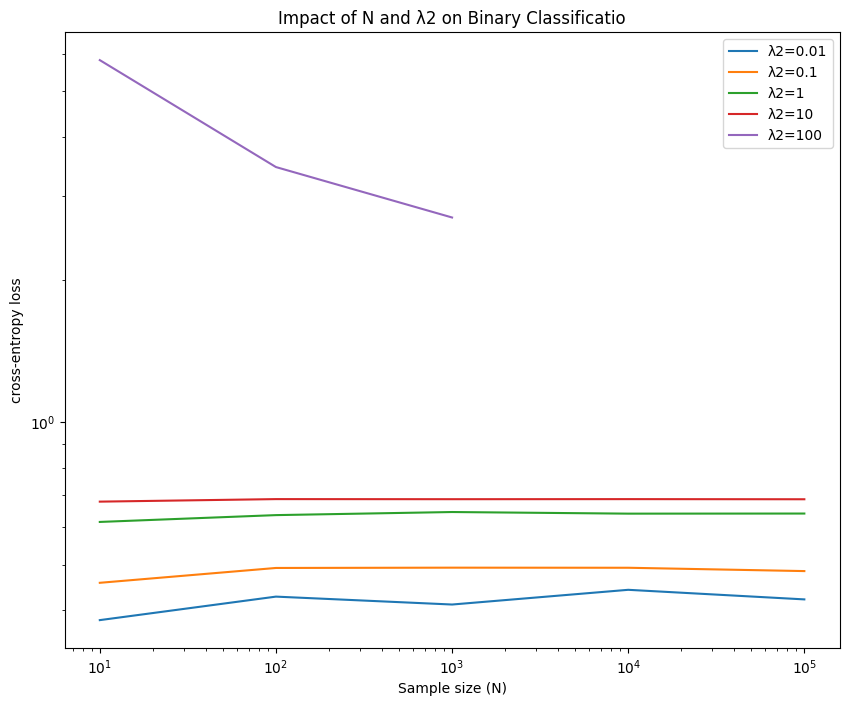

In [ ]:
def sigmoid(z):

    sig_value = 1 / (1 + np.exp(-z))
    #putting the value in sigmoid function which will return probabilities between 0 and 1
    #inspiration : 1

    return sig_value

def binary_cross_entropy(t, y):
    #in 10th question we used NMRSE but in this question we will use binary cross entropy ( it is loss function of binary classification)

    cross_entropy = -np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))
    #calculating binary cross entropy loss using formula
    #inspiration : 1

    return cross_entropy

def gradient_descent_binary(X, t, λ2, l_rate=0.01, iterations=1000, tolerance=1e-6):
    N, D = X.shape
    #getting no.of rows/sample size (N), no. of features/no. of weights (D)

    w = np.random.randn(D)
    #creating weights which will get trained

    for iter in range(iterations):
        z = X @ w
        #creating output z by doing matrix multiplication of X and w which will we then send to sigmoid function to get probabilities

        y = sigmoid(z)
        #calling function sigmoid and giving z as argument which will return probabilities between 0 and 1

        error = y - t
        #difference between predicted probabilties and actual values

        grad_cross_entropy = (1 / N) * X.T @ error
        #calculating gradient as already done in previous question

        grad_L2 = 2 * λ2 * w
        #calculating gradient of L2 as already done in prev questions , just multiplying with regularization parameter

        gradient = grad_cross_entropy + grad_L2
        #combining gradients

        w_new = w - l_rate * gradient
        #calculating updated/better weights by substracting scaled gradient(scaled by learning rate(learning rate random (0.01))) from the current weights

        if np.linalg.norm(w_new - w) < tolerance:
            break
        #checking if the weights are not changing much , that is norm of difference of new weights and older is less than some very small value (tolerance), if so then stop

        w = w_new
        #updating weights

    return w

# MAIN CODE STARTING FROM HERE

np.random.seed(42)

values_of_N = [10, 100, 1000, 10000, 100000]
#values for N at log scale

lambda2_values = [0.01, 0.1, 1, 10, 100]
#values for lambda2 at log scale

results = np.zeros((len(values_of_N), len(lambda2_values)))
#creating an 2D array to store the results with no. of rows being size of size of values_of_N array(5) and no. of columns being size of lambda2_values array (5), 2d array of total 25 elements

D = 10
#number of features or also number of columns in data matrix

sigma = 0.1
#fixed noise variance as given in question

G = np.eye(D)
#fixed generator matrix as given in the question

for i, N in enumerate(values_of_N):
    #outer loop looping over values_of_N , enumerate() to get index (i)

    for j, lambda2 in enumerate(lambda2_values):
        #inner loop looping over lambda2_values , enumerate() to get index (j)

        cross_entropy_results = []
        #saving cross-entropy values(not the average value) of  the 5 loops

        for k in range(5):
            #THE innermost loop which for 5 time for each combination of N and lamda2

            X = np.random.randn(N, D) @ G
            #creating the data matrix of N data points and D features

            w_true = np.random.randn(D)
            # weights to calculate the target vector(true values which we will compare with the perdicted values)

            t = sigmoid(X @ w_true + np.random.normal(0, sigma, N))
            #creating target vector t with noise of constant variance

            for l, output in enumerate(t):
                if output > 0.5 :
                    t[i] = 1
            #classifying/categorising outpurt into 0 or 1 , if output is greater than 0.5 then it is categorised as 1 or else 0

            w = gradient_descent_binary(X, t, lambda2)
            #the autual training of weights, gradient descent function is used which defined above

            y = sigmoid(X @ w)
            #calculating the predicted values which then will be compared with actual values of validation and calculated cross-entropy

            cross_entropy_value = binary_cross_entropy(t, y)
            #calculating cross-entropy value which is just the function call wiht arguments of predicted and actual target vectors, function is defined above

            cross_entropy_results.append(cross_entropy_value)
            #adding the calculated value to array of which the average will be calculated

        results[i, j] = np.mean(cross_entropy_results)
        #storing mean nrmse value which we gained after 5 loops for each combination

plt.figure(figsize=(10, 8))
#size of plot 10 units wide , 8 units long

for i, lambda2 in enumerate(lambda2_values):
    #loops each lambda also giving its index through enumerate()

    plt.loglog(values_of_N, results[:, i], label=f'λ2={lambda2}')
    #plots samples sizes/no. of data points(N) in x-axis , nrmse as y-axis as nmrse were stored in a 2D array named results[k,l] where N varied through 'k' and that's why it is written as results[:, i] for y axis, for loop i , it plots the cross-entropy for for different N '[:]' and ith lambda2 [i]. also giving it label of lambda2

plt.xlabel('Sample size (N)')
plt.ylabel('cross-entropy loss')
#labeling axes

plt.title('Impact of N and λ2 on Binary Classificatio')
#labeling plot

plt.legend()
# showing legends
plt.show()
# printing plot



as we can see can that for greater values of lambda2 , the cross-entropy increase . we have seen similar trend  in question 10 where nrmse increases as lambda2 increases. The increase in binary cross entropy due to increase in lambda2 is due to underfitting. Also for lambda2 = 100, cross-entropy decreases as sample size increase but still way greater than other lambda2 values, while we expected similar trend for other lambda2 values , the results are different that might be due to the noise we added